<a href="https://colab.research.google.com/github/annakasper1/QNC/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercises**
Using the following data set to investigate the relationship between Age and Wing Length, and use the data to generate answers to the prompts below:

Age	Wing Length
3	1.4
4	1.5
5	2.2
6	2.4
7	3.1
8	3.2
9	3.2
11	3.9
12	4.1
14	4.7
15	4.5
16	5.2
17	5.0
Answers to the exercises below will be found here after the due date.

1. Plot the relationship between Age and Wing Length.
2. Calculate and plot the regression line.
3. Can you reject the null hypothesis of b = 0?
4. Calculate and plot the confidence intervals on the slope of the regression.
4. Calculate r squared
 (the coefficient of determination)
6. Calculate Pearson's r.
7. Add some noise to the data and see how the regression changes.

In [2]:
import numpy as np  # Performs math functions on arrays
import matplotlib.pyplot as plt  # Draws graphs
import pandas as pd  #Organizes data in tables
import seaborn as sns  # Makes graphs look nicer
import statsmodels.api as sm  # Allows us to do regression
from scipy.stats import pearsonr  # Calculates Pearson's correlation

# Create the data as a dictionary and convert it into a dataframe
data = {
    'Age': [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17],  # ages of birds
    'Wing Length': [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]  # wing lengths of birds
}
df = pd.DataFrame(data)


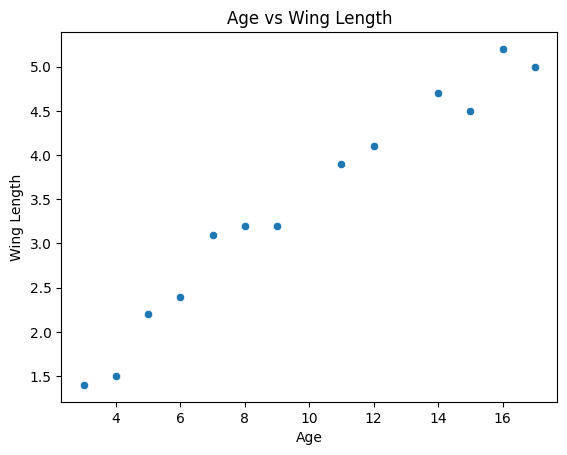

In [3]:
# Exercise 1: Plots the relationship between Age and Wing Length
sns.scatterplot(x='Age', y='Wing Length', data=df)  # draws dots for each bird
plt.title('Age vs Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.show()


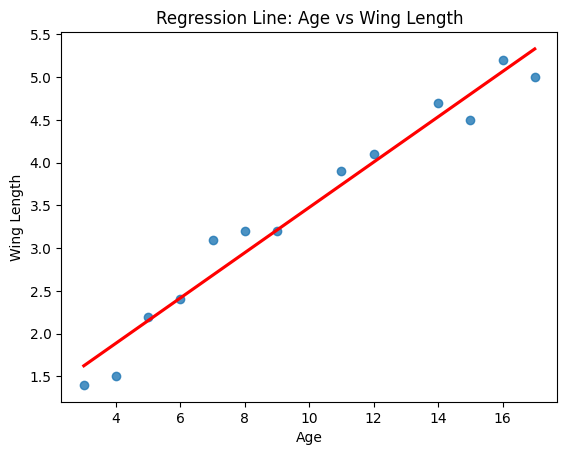

In [13]:
# Exercise 2: Sets up the regression model (wing length = b0 + age*b1). B0 is the interecept (starting value of wing length when age is 0). b1 is the slope of wing length increase for every 1 year of age.
# Set up regression model
X = sm.add_constant(df['Age'])  # add a column of 1s so that the intercept is added once for each row
y = df['Wing Length']  # grabs the wing length column to predict wing length based on age

#Fit regression model
model = sm.OLS(y, X).fit()  # OLS stands for ordinary least squares. Uses age x to predict wing length y.

# Plot the regression line
sns.regplot(x='Age', y='Wing Length', data=df, ci=None, line_kws={"color": "red"})  # draw the best-fit line

# Draw best fit line
plt.title('Regression Line: Age vs Wing Length')  # title of the graph
plt.xlabel('Age')  # label for x-axis
plt.ylabel('Wing Length')  # label for y-axis
plt.show()  # show the graph


In [16]:
# Exercise 3: Can you reject the null hypothesis of b = 0?

# Extract the slope (coefficient for Age)
slope = model.params['Age']
print(f"Slope of the regression line (coefficient for Age): {slope}")

# Extract the p-value for the slope (Age)
p_value_slope = model.pvalues['Age']

# Print the p-value
print(f"P-value for the slope being zero: {p_value_slope:.10f}. Because the p-value is less than 0.05, this provides support for rejecting the null hypothesis.")


Slope of the regression line (coefficient for Age): 0.26468412066021624
P-value for the slope being zero: 0.0000000030. Because the p-value is less than 0.05, this provides support for rejecting the null hypothesis.


95% Confidence Interval for the slope: [0.2304, 0.2989]


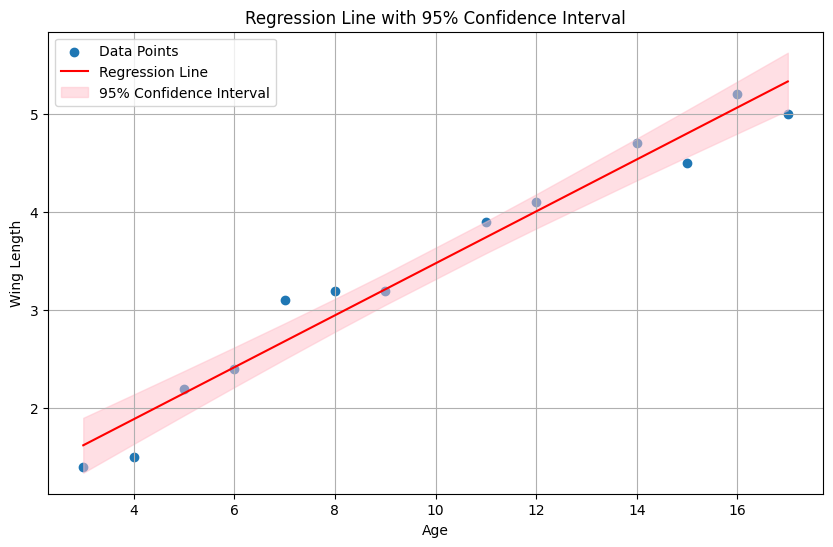

In [17]:
# Exercise 4: Get the confidence interval for the slope
conf_int = model.conf_int()  # get the confidence intervals for the model
slope_conf_int = conf_int.loc['Age']  # get the interval just for the slope
print(f"95% Confidence Interval for the slope: [{slope_conf_int[0]:.4f}, {slope_conf_int[1]:.4f}]")
# Result: 95% confident that the true slope (effect of Age on Wing Length) is between 0.2304 and 0.2989. Zero is not in the range, thus supports rejecting the null hypothesis that the slope is zero.

# Plot the data and regression line with confidence intervals
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Wing Length'], label='Data Points')
plt.plot(df['Age'], pred_summary['mean'], color='red', label='Regression Line')
plt.fill_between(df['Age'], pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], color='pink', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Regression Line with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Exercise 5: Get R-squared value
r_squared = model.rsquared  # how well the line fits the data
print(f"R-squared: {r_squared:.4f}")  # print R-squared value

# This means that the best fit line fits the data pretty well since it's close to 1. Only 3.66% of variation left is unexplained.


R-squared: 0.9634


In [ ]:
# Exercise 6: Calculate Pearson's r
r, p_value = pearsonr(df['Age'], df['Wing Length'])  # measure how strongly age and wing length are related
print(f"Pearson's r: {r:.4f}, p-value: {p_value:.2e}")  # print correlation and p-value


In [ ]:
# Exercise 7: Add noise to the Wing Length data
np.random.seed(42)  # set a seed so we get the same random numbers every time
noise = np.random.normal(0, 0.3, len(df))  # create random noise with mean 0 and std 0.3
df['Wing Length Noisy'] = df['Wing Length'] + noise  # add noise to wing lengths
# Plot the noisy data with regression line
sns.regplot(x='Age', y='Wing Length Noisy', data=df, ci=None, line_kws={"color": "green"})  # draw new line with noisy data
plt.title('Regression with Noisy Data')  # title of the graph
plt.xlabel('Age')  # label for x-axis
plt.ylabel('Wing Length (Noisy)')  # label for y-axis
plt.show()  # show the graph